In [25]:
%matplotlib inline
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import pickle
import matplotlib.pyplot as plt

In [3]:
with open('df_now_HVAVC.pkl', 'rb') as handle:
    df = pickle.load(handle)

In [5]:
df.columns

Index(['Work Order', 'WO Type', 'Charge Type', 'Reference Number', 'Project',
       'Action Requested', 'Priority', 'Status', 'Requestor', 'Req Phone',
       'Department', 'Dept Number', 'Account Number(s)', 'Campus', 'Building',
       'Floor', 'Area', 'Area Function', 'Area Type', 'Object Type',
       'WO Object', 'Date Requested', 'Date Estimate Began',
       'Date Estimate Was Completed', 'Days to Estimate Completed',
       'Date WO Issued', 'Days to Issue', 'Scheduled Start Date',
       'Date Funded', 'Funded Amount', 'First Charge', 'Days to Start',
       'Scheduled Completion Date', 'Date Finished', 'Days to Finish',
       'Date Completed', 'Days to Completion', 'Labor Hours', 'FM Labor',
       'Flat Bill', 'Warehouse Parts', 'NonStock Received and Invoiced',
       'NonStock Received Not Invoiced', 'NonStock On Order Not Received',
       'Total', 'Assigned Trades', 'General Comments', 'Task Comments',
       'Topics'],
      dtype='object')

In [12]:
df_cost = df[['Date Finished', 'Total']]
print(len(df_cost))
df_cost = df_cost[df_cost['Date Finished'] != '- -']
df_cost = df_cost[df_cost['Total'] != 0]
print(len(df_cost))
print(type(df_cost.iloc[0]['Date Finished']))

43011
9588
<class 'datetime.datetime'>


In [17]:
df_monthly = df_cost.groupby(df_cost['Date Finished'].dt.strftime('%Y-%m'))['Total'].sum()

In [23]:
print(df_monthly)

Date Finished
2015-06      1510.49
2015-07     65065.60
2015-08     86773.54
2015-09    109846.03
2015-10     92418.11
2015-11    102586.89
2015-12     80368.29
2016-01    116771.45
2016-02    111816.17
2016-03    138418.82
2016-04    200654.27
2016-05    144871.96
2016-06    319948.19
2016-07    207572.03
2016-08    146192.13
2016-09    103474.87
2016-10    137828.22
2016-11    192985.84
2016-12    190528.84
2017-01    231259.86
2017-02     58414.97
2017-03    243185.35
2017-04     81506.71
2017-05    216062.19
Name: Total, dtype: float64


[   1510.49   65065.6    86773.54  109846.03   92418.11  102586.89
   80368.29  116771.45  111816.17  138418.82  200654.27  144871.96
  319948.19  207572.03  146192.13  103474.87  137828.22  192985.84
  190528.84  231259.86   58414.97  243185.35]
Predict 81506.71
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   21
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -261.063
Method:                       css-mle   S.D. of innovations          58728.075
Date:                Mon, 20 Nov 2017   AIC                            536.125
Time:                        23:40:57   BIC                            543.437
Sample:                             1   HQIC                           537.712
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

C:\Users\Arjun\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


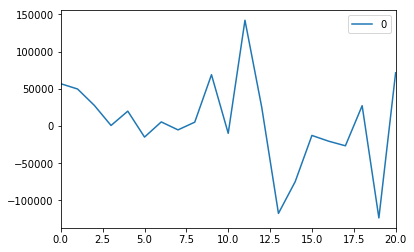

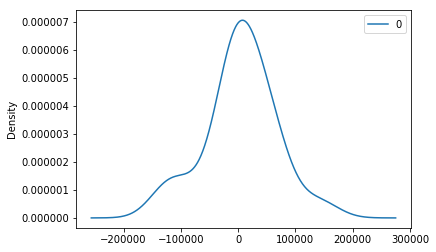

                   0
count      21.000000
mean     4582.581508
std     60941.763718
min   -123522.566852
25%    -14851.270955
50%      5203.091495
75%     27789.472333
max    142208.154716


In [39]:
X = df_monthly.values
size = len(X)
print(X[:-2])
print('Predict', X[-2])
model = ARIMA(X[:-2], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

[ 148576.80208567]


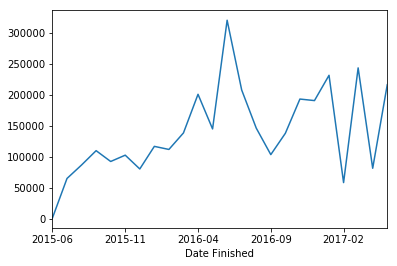

In [40]:
prediction = model_fit.forecast()
print(prediction[0])
#monthly_df_predicted = df_monthly.append(prediction[0])
df_monthly.plot()
plt.show()